2024-08-30 16:06:25 - ⧮ Stdev calculation initialized
2024-08-30 16:06:25 - 📈 Data Management Initialized
2024-08-30 16:06:25.969 - ⏱️ time management initialized
2024-08-30 16:06:25 - 📊 plot management initialized
2024-08-30 16:06:25 - 📊 plot management initialized
Requested time range ['2023-09-28/06:38:27', '2023-09-28/06:39:50'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl
Extended data has 24317 points, from 2023-09-28 06:38:27.000068480 to 2023-09-28 06:39:49.999096064

Processing window: 10s

Processing window: 15s

Processing window: 20s

Processing window: 25s

Processing window: 30s

Processing window: 35s

Processing window: 40s

Plotting Bmag with Multiple Standard Deviation Ranges
Number of data points: 879


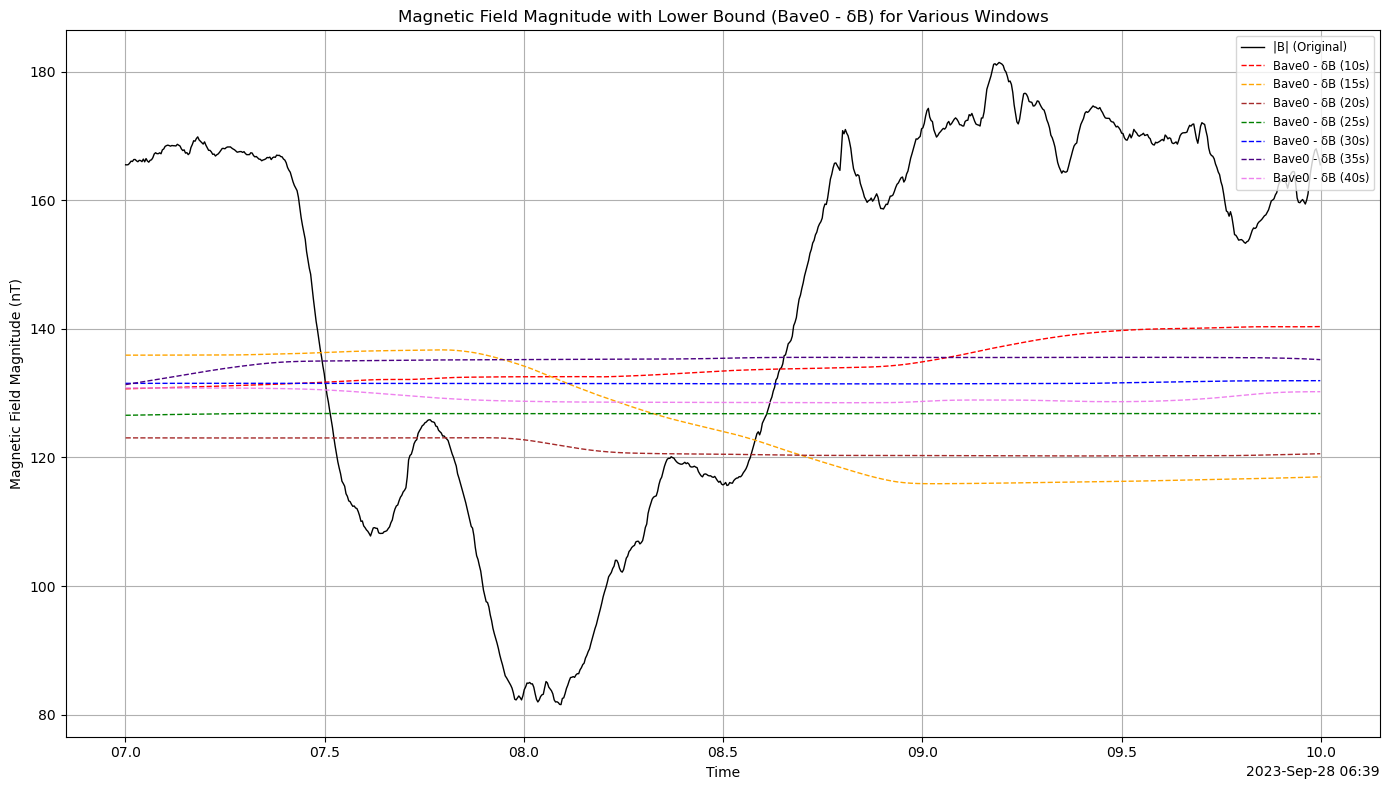

In [10]:
import importlib

import stdev
importlib.reload(stdev)
from stdev import *

import data_management
importlib.reload(data_management)
from data_management import *

import plotting
importlib.reload(plotting)
from plotting import *

# -------- Meta-Controls -------- # 🚀🚀🚀🚀🚀
line_thickness = 1  # Adjust the thickness of all lines
INSTRUMENT_SAMPLING_RATE = 292.9  # Samples per second (adjust as needed)
# smoothing_windows = [10, 14, 18, 22, 24, 28, 32]  # Standard deviation windows in seconds
smoothing_windows = [10, 15, 20, 25, 30, 35, 40]  # Standard deviation windows in seconds

# -------- Set Time Range -------- #
# trange = ['2023-09-28/06:38:30', '2023-09-28/06:39:00']  # Define the original time range for the analysis
# trange = ['2023-09-28/06:32:50', '2023-09-28/06:32:52']  

# trange = ['2023-09-28/06:36:45', '2023-09-28/06:37:00'] # GREAT WILD Testing region, works with no before after avg, OMG
# trange = ['2023-09-28/06:37:15.000', '2023-09-28/06:37:45.000'] # range with lots of dips
# trange = ['2023-09-28/06:39:31.000', '2023-09-28/06:39:35.000'] #⭐️⭐️⭐️ PERFECT Single hole for testing
trange = ['2023-09-28/06:39:07.000', '2023-09-28/06:39:10.000'] #WONKY WONKS

# Extend the time range to account for the largest window size
max_window_seconds = max(smoothing_windows)
extended_trange = extend_time_range_stdev(trange, max_window_seconds)  # Extend the time range to account for the window

# Download and prepare the data for the extended time range
times_extended, br, bt, bn, bmag_extended = download_and_prepare_high_res_mag_data(extended_trange)

# Confirm that data is extended
print(f"Extended data has {len(times_extended)} points, from {times_extended[0]} to {times_extended[-1]}")

# Calculate the standard deviation and bounds using the extended data
stdev_bounds_dict = calculate_stdev_and_bounds(bmag_extended, smoothing_windows, INSTRUMENT_SAMPLING_RATE)

# Clip the original bmag data to the original time range
times_clipped, bmag_clipped = clip_to_original_time_range_stdev(times_extended, bmag_extended, trange)

# Now, clip the standard deviation bounds to the original time range
clipped_stdev_bounds_dict = {}
for key, (lower_bound, upper_bound) in stdev_bounds_dict.items():
    _, clipped_lower_bound = clip_to_original_time_range_stdev(times_extended, lower_bound, trange)
    _, clipped_upper_bound = clip_to_original_time_range_stdev(times_extended, upper_bound, trange)
    clipped_stdev_bounds_dict[key] = (clipped_lower_bound, clipped_upper_bound)

# Plot the magnetic field magnitude with lower bounds only
plot_bmag_with_stdev_ranges(times_clipped, bmag_clipped, clipped_stdev_bounds_dict, line_thickness)
